GEOPANDAS

In [1]:
import pandas as pd

In [3]:
import geopandas as gpd

In [8]:
#create a geodata frame using shapely
from shapely.geometry import Point,LineString,Polygon

In [ ]:
point_data = {'Location':['Archives','Nyayo'],
               'Geometry':[Point(1.2848,36.8260),Point(1.3041,36.8246)]}

line_data = {"Line":["Archives_Nyayo"],
               'Geometry':LineString([(1.2848,36.8260),(1.3041,36.8246)])}

polygon_data = {"Name":"Polygon",
                  'geometry':[Polygon([(1,1),(2,1)(2,2)(1,2)])]}


TypeError: 'tuple' object is not callable

In [11]:
import geodatasets
import matplotlib.pyplot as plt

In [12]:

url = 'https://raw.githubusercontent.com/jcanalesluna/bcn-geodata/master/districtes/districtes.geojson'

districts = gpd.read_file(url)

In [13]:
districts.head()

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.1869 41.40165, 2.18689 41.40087, 2..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.10342 41.4011, 2.10352 41.40109, 2..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4..."


In [14]:
districts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID_ANNEX    10 non-null     object  
 1   ANNEXDESCR  10 non-null     object  
 2   ID_TEMA     10 non-null     object  
 3   TEMA_DESCR  10 non-null     object  
 4   ID_CONJUNT  10 non-null     object  
 5   CONJ_DESCR  10 non-null     object  
 6   ID_SUBCONJ  10 non-null     object  
 7   SCONJ_DESC  10 non-null     object  
 8   ID_ELEMENT  10 non-null     object  
 9   ELEM_DESCR  10 non-null     object  
 10  NIVELL      10 non-null     object  
 11  NDESCR_CA   10 non-null     object  
 12  NDESCR_ES   10 non-null     object  
 13  NDESCR_EN   10 non-null     object  
 14  TERME       10 non-null     object  
 15  DISTRICTE   10 non-null     object  
 16  BARRI       10 non-null     object  
 17  AEB         10 non-null     object  
 18  SEC_CENS    10 non-null     object  
 19  GRA

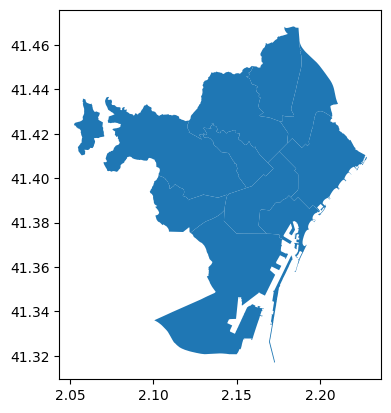

In [17]:
districts.plot()
plt.show()

.cx[xmin:xmax,ymin:ymax]

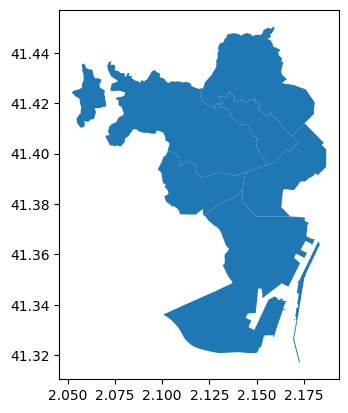

In [20]:
districts.cx[2.10:2.15,41.36:41.42].plot()
plt.show()

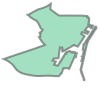

In [22]:
districts['geometry'].iloc[2]

In [24]:
districts[['geometry']].iloc[1].to_list()

[<POLYGON ((2.187 41.402, 2.187 41.401, 2.187 41.4, 2.187 41.399, 2.187 41.39...>]

In [25]:
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
spain = districts.to_crs(epsg=2062)

In [27]:
spain.crs

<Projected CRS: EPSG:2062>
Name: Madrid 1870 (Madrid) / Spain LCC
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Spain - mainland onshore.
- bounds: (-9.37, 35.95, 3.39, 43.82)
Coordinate Operation:
- name: Spain
- method: Lambert Conic Conformal (1SP)
Datum: Madrid 1870 (Madrid)
- Ellipsoid: Struve 1860
- Prime Meridian: Madrid

In [30]:
spain['Areas']= spain['geometry'].area/1000000


In [29]:
spain['geometry'].bounds

,minx,miny,maxx,maxy
0,1.088630e+06,766775.874922,1.091640e+06,770572.184373
1,1.086875e+06,768501.225940,1.090495e+06,772733.885980
2,1.083720e+06,762200.011028,1.090443e+06,769628.877643
3,1.083075e+06,768376.338982,1.086968e+06,771130.819176
4,1.079068e+06,770005.676529,1.087893e+06,774897.073988
5,1.085519e+06,770802.459537,1.089190e+06,773935.124142
6,1.084749e+06,772131.008663,1.089810e+06,776905.124167
7,1.087528e+06,774222.410707,1.090249e+06,779010.604277
8,1.089372e+06,772990.161664,1.092205e+06,778346.195224
9,1.089420e+06,769690.535920,1.093823e+06,774879.256455


In [34]:
spain[['minx', 'miny', 'maxx', 'maxy']] = spain['geometry'].bounds

In [35]:
spain.head()

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry,Ares,Areas,minx,miny,maxx,maxy
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,#000000,Negre,#000000,"POLYGON ((1090241.744 770405.596, 1090342.582 ...",4.200406,4.200406,1.088630e+06,766775.874922,1.091640e+06,770572.184373
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,#000000,Negre,#000000,"POLYGON ((1090448.237 771647.183, 1090453.694 ...",7.456303,7.456303,1.086875e+06,768501.225940,1.090495e+06,772733.885980
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,#000000,Negre,#000000,"MULTIPOLYGON (((1087409.714 768620.322, 108747...",22.854384,22.854384,1.083720e+06,762200.011028,1.090443e+06,769628.877643
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,#000000,Negre,#000000,"POLYGON ((1083492.496 771129.964, 1083500.768 ...",6.004220,6.004220,1.083075e+06,768376.338982,1.086968e+06,771130.819176
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,#000000,Negre,#000000,"MULTIPOLYGON (((1080722.37 774743.807, 1080727...",19.894238,19.894238,1.079068e+06,770005.676529,1.087893e+06,774897.073988


In [36]:
spain['geometry'].centroid

0    POINT (1090083.871 769341.012)
1    POINT (1088651.674 770409.974)
2    POINT (1087284.958 765672.155)
3    POINT (1084830.283 769641.619)
4    POINT (1083668.091 772419.768)
5    POINT (1087495.217 772409.978)
6     POINT (1087220.19 774493.588)
7     POINT (1089137.043 776526.34)
8    POINT (1090738.684 775378.323)
9    POINT (1091583.398 772387.065)
dtype: geometry

In [40]:
from shapely.geometry import point
sagrada_fam = Point([2.1744,41.4036])

sagrada_gdf= gpd.GeoSeries(sagrada_fam,crs=2062)

In [41]:
sagrada_gdf

0    POINT (2.174 41.404)
dtype: geometry